In [214]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
from matplotlib import pyplot as plt
from preprocessing import process_handwriting, data_import_handwriting
import numpy as np
from tensorflow.math import confusion_matrix


In [215]:
data_path = "./CS671-DLA-Assignment4-Data-2022/Handwriting_Data"
x_train, y_train, x_test, y_test = data_import_handwriting(data_path)
# print(x_train[3].shape)
x_max=np.nan
# x_train, x_max = padding_sequences(x_train)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
# print(y_train)
# x_test = padding_sequences(x_test)


In [216]:
x_train[100]

array([[0.15789411, 0.5416664 ],
       [0.13158041, 0.5416664 ],
       [0.10526274, 0.5416664 ],
       [0.07894904, 0.5416664 ],
       [0.02631767, 0.58332966],
       [0.        , 0.66666247],
       [0.05263137, 0.74999528],
       [0.10526274, 0.79166483],
       [0.21052548, 0.83333438],
       [0.26315685, 0.83333438],
       [0.26315685, 0.66666247],
       [0.21052548, 0.5416664 ],
       [0.15789411, 0.37500079],
       [0.13158041, 0.20833517],
       [0.10526274, 0.08333281],
       [0.13158041, 0.04166955],
       [0.18421178, 0.        ],
       [0.26315685, 0.04166955],
       [0.28947452, 0.08333281],
       [0.31578822, 0.12500236],
       [0.34210589, 0.16666562],
       [0.36841959, 0.20833517],
       [0.39473726, 0.20833517],
       [0.39473726, 0.16666562],
       [0.44736863, 0.12500236],
       [0.52631767, 0.08333281],
       [0.57894904, 0.12500236],
       [0.60526274, 0.20833517],
       [0.63158041, 0.41666405],
       [0.63158041, 0.58332966],
       [0.

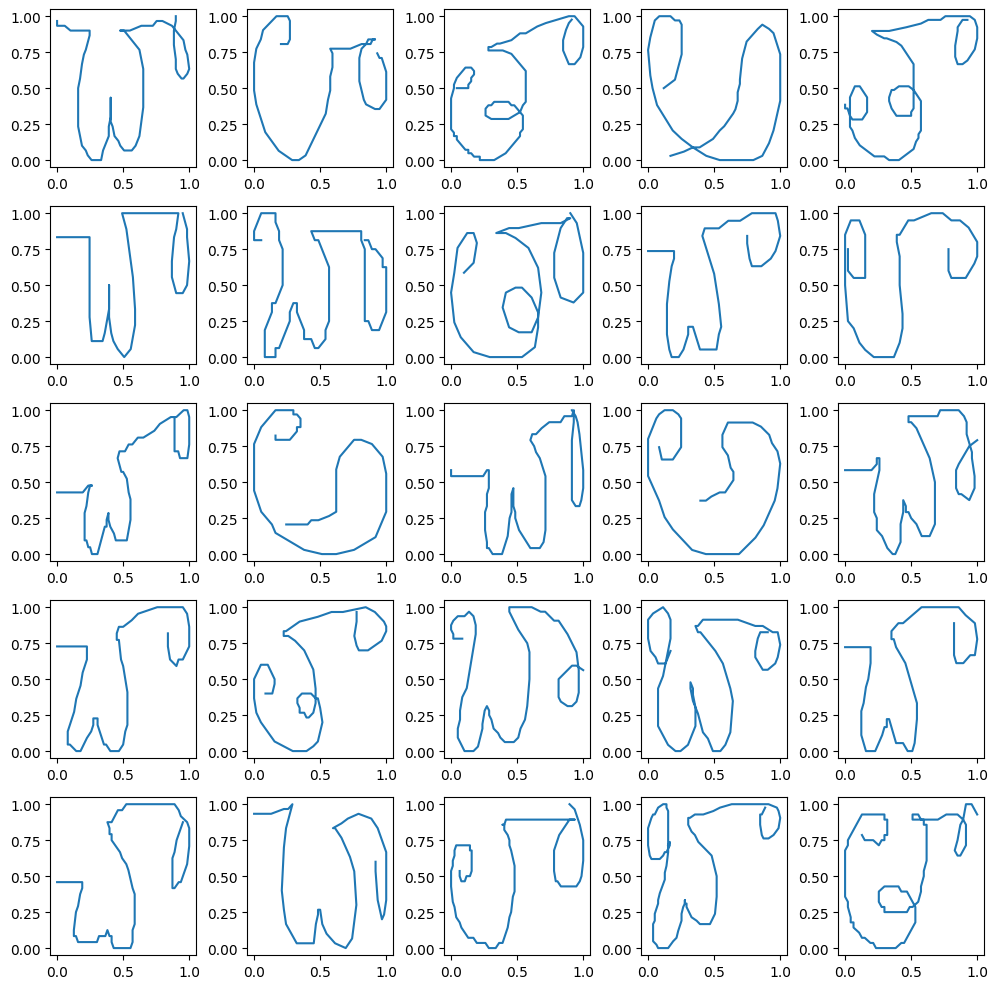

In [217]:
import matplotlib.pyplot as plt
rand_idx = np.random.randint(0,344,(25,))
plt.figure(figsize=(10,10))
for i, idx in enumerate(rand_idx):
    plt.subplot(5,5,i+1)
    plt.plot(x_train[idx][:, 0], x_train[idx][:, 1])
plt.tight_layout()
plt.show()

In [218]:
# x_train[0]

# RNN-Architecture1

In [247]:
rnn = load_model("./models/handwriting_rnn1.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 32)           1120      
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 5)                 32005     
                                                                 
Total params: 33,125
Trainable params: 33,125
Non-trainable params: 0
_________________________________________________________________


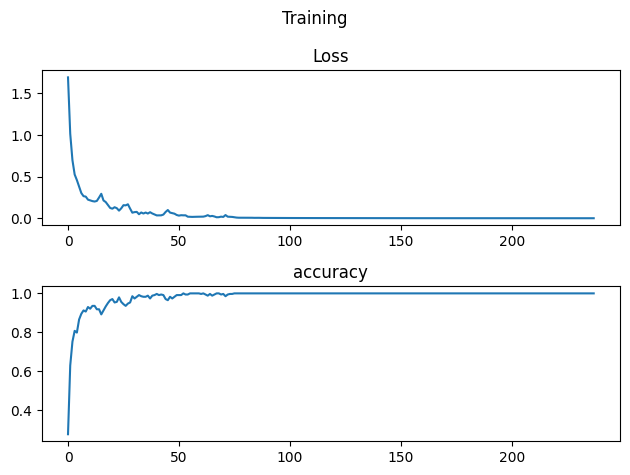

In [248]:
with open("./logs/hist_handrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [249]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [250]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 4ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [251]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 4ms/step - loss: 3.5092e-04 - accuracy: 1.0000


[0.0003509209491312504, 1.0]

In [252]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.9700


[0.22298014163970947, 0.9700000286102295]

In [253]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 3ms/step
[[20  0  0  0  0]
 [ 1 19  0  0  0]
 [ 1  1 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


# RNN-Architecture2

In [268]:
rnn = load_model("./models/handwriting_rnn2.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200, 5)            80        
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 5)                 5005      
                                                                 
Total params: 5,215
Trainable params: 5,215
Non-trainable params: 0
_________________________________________________________________


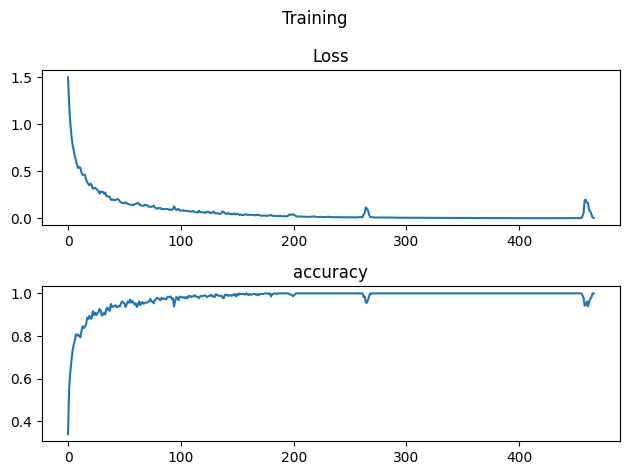

In [241]:
with open("./logs/hist_handrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [242]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [243]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 6ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [244]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 1.0000


[0.004333095159381628, 1.0]

In [245]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.1999 - accuracy: 0.9800


[0.19993121922016144, 0.9800000190734863]

In [246]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 6ms/step
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  2 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


# RNN-Architecture3

In [261]:
rnn = load_model("./models/handwriting_rnn3.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200, 15)           390       
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 200)               600200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

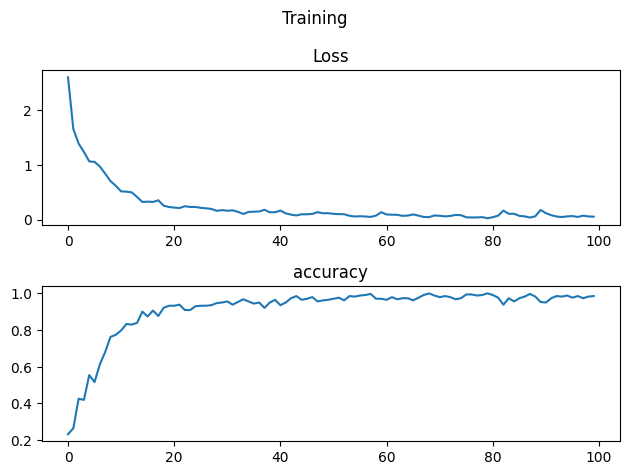

In [262]:
with open("./logs/hist_handrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [263]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [264]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 8ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  1 69  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [265]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9971


[0.014580887742340565, 0.9970845580101013]

In [266]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.1164 - accuracy: 0.9700


[0.11637511849403381, 0.9700000286102295]

In [267]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 6ms/step
[[20  0  0  0  0]
 [ 0 19  1  0  0]
 [ 0  1 18  0  1]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


# LSTM-Architecture1

In [269]:
rnn = load_model("./models/handwriting_lstm1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 32)           4480      
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 5)                 32005     
                                                                 
Total params: 36,485
Trainable params: 36,485
Non-trainable params: 0
_________________________________________________________________


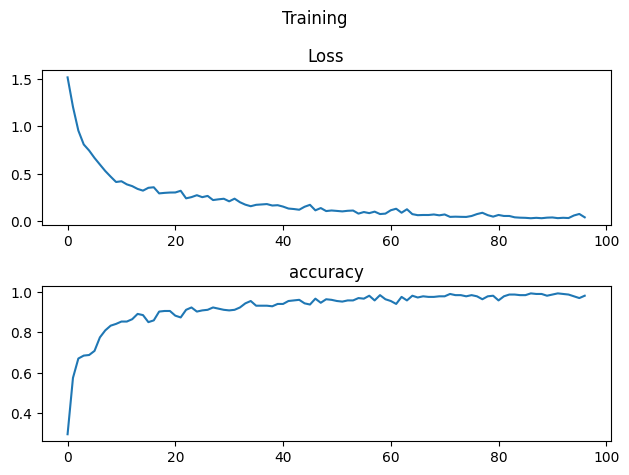

In [270]:
with open("./logs/hist_handlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [271]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [272]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 9ms/step
[[69  0  0  0  0]
 [ 0 61  6  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [273]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 6ms/step - loss: 0.0529 - accuracy: 0.9825


[0.052928995341062546, 0.9825072884559631]

In [274]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.0677 - accuracy: 0.9700


[0.06769145280122757, 0.9700000286102295]

In [275]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  1 18  0  1]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


# LSTM-Architecture2

In [276]:
rnn = load_model("./models/handwriting_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 200, 5)            320       
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 5)                 5005      
                                                                 
Total params: 5,845
Trainable params: 5,845
Non-trainable par

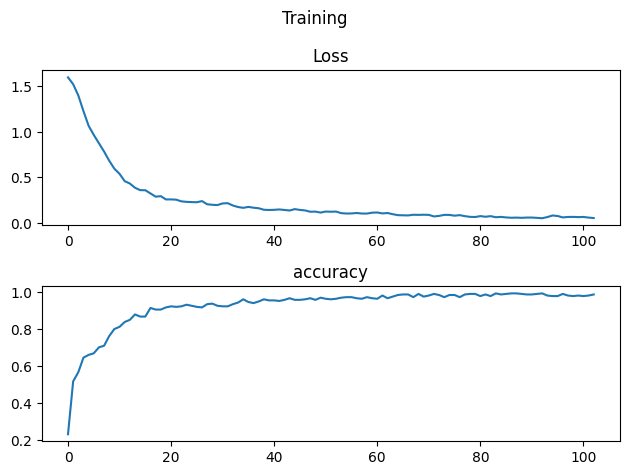

In [277]:
with open("./logs/hist_handlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [278]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [279]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 8ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  3 67  0  0]
 [ 0  0  0 68  0]
 [ 0  1  1  0 67]]


In [280]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 8ms/step - loss: 0.0497 - accuracy: 0.9854


[0.04968438670039177, 0.9854227304458618]

In [281]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 8ms/step - loss: 0.0936 - accuracy: 0.9700


[0.09356758743524551, 0.9700000286102295]

In [282]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 8ms/step
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  2 18  0  0]
 [ 0  0  0 20  0]
 [ 0  1  0  0 19]]


# LSTM-Architecture3

In [283]:
rnn = load_model("./models/handwriting_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200, 15)           390       
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 200)               600200    
                                                                 
 dropout (Dropout)           (None, 200)               0     

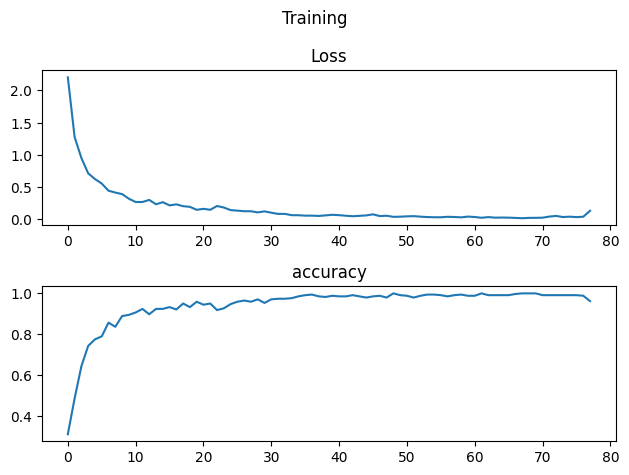

In [284]:
with open("./logs/hist_handlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [285]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [286]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 6ms/step
[[69  0  0  0  0]
 [ 0 66  1  0  0]
 [ 0  1 69  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [287]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.9942


[0.01593022793531418, 0.9941691160202026]

In [288]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.1693 - accuracy: 0.9500


[0.16930387914180756, 0.949999988079071]

In [289]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 6ms/step
[[20  0  0  0  0]
 [ 0 19  1  0  0]
 [ 0  4 16  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]
